In [1]:
import sys
!{sys.executable} -m pip install together matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 82.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:

from together import Together
import os
import requests
import json

# Get a free API key from https://api.together.xyz/settings/api-keys
os.environ["TOGETHER_API_KEY"] = "b31b8fa290ab9fa8439bd1686dc60dd44e0238393e49e96f7f577699db69d877"

def llama32(messages, model_size=11):
  model = f"meta-llama/Llama-3.2-{model_size}B-Vision-Instruct-Turbo"
  url = "https://api.together.xyz/v1/chat/completions"
  payload = {
    "model": model,
    "max_tokens": 4096,
    "temperature": 0.0,
    "stop": ["<|eot_id|>","<|eom_id|>"],
    "messages": messages
  }

  headers = {
    "Accept": "application/json",
    "Content-Type": "application/json",
    "Authorization": "Bearer " + os.environ["TOGETHER_API_KEY"]
  }
  res = json.loads(requests.request("POST", url, headers=headers, data=json.dumps(payload)).content)

  if 'error' in res:
    raise Exception(res['error'])

  return res['choices'][0]['message']['content']



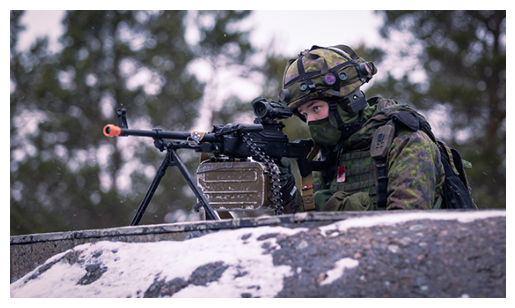

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

def display_local_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

display_local_image("/workspaces/BDA_Master_Thesis_ThreatDetection_Data/Data/Images/Test_Image_Semi_Threat.jpg")

In [4]:
import base64

def encode_image(image_path):
  with open(image_path, "rb") as img:
    return base64.b64encode(img.read()).decode('utf-8')

base64_image = encode_image("/workspaces/BDA_Master_Thesis_ThreatDetection_Data/Data/Images/Test_Image_Semi_Threat.jpg")

In [5]:
messages = [
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": "Describe the image!"
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image}"
        }
      }
    ]
  },
]

result = llama32(messages)
print(result)

The image depicts a soldier in camouflage gear, armed with a machine gun, positioned behind a concrete wall or barrier. The soldier is attired in a green camouflage uniform, helmet, and vest, with a black and orange machine gun held in their hands. The machine gun features a black tripod and a black and orange barrel.

In the foreground, a concrete wall or barrier is visible, with a small patch of snow on top. The background of the image is blurred, but it appears to be a wooded area with trees and a gray sky. The overall atmosphere of the image suggests that the soldier is engaged in a military operation or training exercise, possibly in a snowy or cold environment.


In [6]:
base64_image2 = encode_image("/workspaces/BDA_Master_Thesis_ThreatDetection_Data/Data/Images/Midium_Threat.jpg")
base64_image3= encode_image("/workspaces/BDA_Master_Thesis_ThreatDetection_Data/Data/Images/Non_Threat.jpg")

messages2 = [
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": "Describe the image!"
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image2}"
        }
      }
    ]
  },
]

messages3 = [
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": "Describe the image!"
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image3}"
        }
      }
    ]
  },
]

result = llama32(messages2)
print(result)

The image depicts a tank in a snowy field, with three individuals on top of it. The purpose of the image is to showcase the tank and its occupants in a winter environment.

* A tank:
	+ The tank is positioned in the center of the image.
	+ It has a long barrel and a flat top.
	+ The tank appears to be covered in snow and ice.
* Three people:
	+ One person is standing on top of the tank, wearing a black jacket and pants.
	+ Another person is sitting on the side of the tank, wearing a camouflage jacket and pants.
	+ A third person is crouched down behind the tank, wearing a dark-colored jacket and pants.
* Snow:
	+ The ground around the tank is covered in snow.
	+ There are snow-covered rocks and bushes in the background.

The image suggests that the tank and its occupants are in a cold and snowy environment, possibly during a military operation or training exercise. The presence of snow and ice on the tank and the surrounding area adds to the sense of winter and cold weather.


In [7]:
result = llama32(messages3)
print(result)

The image shows a large green tank on display in a city street, with people gathered around it. The purpose of the image is to showcase the tank and its presence in the city.

* A large green tank is on display in a city street:
	+ The tank is positioned in the center of the image.
	+ It has a long barrel and a flat top.
	+ The tank is painted in a camouflage pattern.
* People are standing around the tank, looking at it:
	+ There are several people standing around the tank, some of whom are taking pictures.
	+ They are all facing the tank and appear to be admiring it.
	+ Some people are standing on the sidewalk, while others are standing in the street.
* The tank has a sign that says "LEOPARD 2A6":
	+ The sign is attached to the side of the tank.
	+ It is written in white letters on a green background.
	+ The sign provides information about the tank's model and type.

Overall, the image suggests that the tank is on display for public viewing, and people are interested in learning more 

Now lets try GPT to generate description/caption

In [1]:
import sys
!{sys.executable} -m pip install tensorflow pillow transformers tf-keras

from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 34.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 74.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 70.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

2024-12-17 08:06:27.601210: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-17 08:06:27.618901: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-17 08:06:27.889091: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-17 08:06:28.009242: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734422788.149453   15134 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734422788.19

In [5]:

# Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image = np.array(image)
    image = np.expand_dims(image, axis=0)
    return image

# Extract features using VGG16
def extract_features(image):
    model = VGG16(weights='imagenet', include_top=False)
    features = model.predict(image)
    features = features.flatten()
    return features


In [6]:

# Generate description using GPT-2
def generate_description(features):
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = TFGPT2LMHeadModel.from_pretrained("gpt2")

    input_ids = tokenizer.encode("Image features: " + str(features), return_tensors='tf')
    output = model.generate(input_ids, max_length=50, num_return_sequences=1)
    description = tokenizer.decode(output[0], skip_special_tokens=True)
    return description

# Main function
def describe_image(image_path):
    image = load_image(image_path)
    features = extract_features(image)
    description = generate_description(features)
    return description


In [9]:

# Example usage
image_path = "/workspaces/codespaces-jupyter/data/Images/Test_Image_Semi_Threat.jpg"
description = describe_image(image_path)
print(description)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Image features: [0. 0. 0. ... 0. 0. 0.]

The first thing you notice is that the number of characters in the string is not the same as the number of characters in the string itself. The number of
